Simple harmonic oscillator equations for energies

    
$U(x) = \frac{1}{2}kx^{2}$

$T(p) = p^{2}/2m$

$F(x) = -kx$





- Set initial velocites and positions
- Calculate Forces
- Integrator - Calculate updated velocity (step)
- Calculate updated position (step)
- Calculate energies (Total, Kinetic, Potential)


In [395]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy import *

In [396]:
#Setting parameters

pos = np.zeros((tmax, 1))
vel = np.zeros((tmax, 1))
pot_en = np.zeros((tmax, 1))
kin_en = np.zeros((tmax, 1))
tot_en = np.zeros((tmax, 1))
forces = np.zeros((tmax, 1))

#Calculating forces
#Update velocites and positions


def calculate_force(time):
    
    global F
    
    F = 0.0
    pot = 0.0
    
    F = -k*x
    
    pot = 0.5*k*(x**2)
    pot_en[t, 0] = pot
    
    #print "                  "
    #print "Force at step %1.6f = %1.6f" % (time, F)
    #print "Potential Energy = %f" % pot
    #print "                 "
    
def integrate_vverlet(switch, F):
    
    global x
    global v
    
    delt = dt*step
    
    if switch == 1:
    
        x_new = x + delt*v + ((delt**2)*0.5)*F
        x = x_new
        
        pos[t, 0] = x
        
        v = v + 0.5*delt*F
        
    elif switch == 2:
        
        ekin = 0.0
        etot = 0.0

        v = v + 0.5*delt*F
        
        vel[t, 0] = v

        ekin = (v**2)/2
        kin_en[t, 0] = ekin
    
        etot = pot_en[t, 0] + ekin
        tot_en[t, 0] = etot
        
        #print 'x = ', x
        #print 'v = ', v
        
        #print "                  "
        #print "Kinetic Energy = %f " % ekin
        #print "Total Energy = %f" % etot
        #print "                  "


In [397]:
#Setting parameters

step = 1.0
dt = 0.01

tmax = 1000
t = 0
k = 10.0

x = 1.0
v = 1.0

#Calculating initial forces

calculate_force(t)

print "--------------------"

while t <= tmax:
    integrate_vverlet(1, F)
    calculate_force(t+1)
    integrate_vverlet(2, F)
    t = t + 1
    


--------------------


IndexError: index 1000 is out of bounds for axis 0 with size 1000

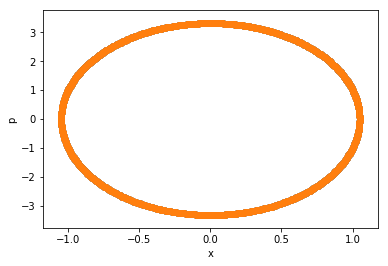

In [401]:
plt.scatter(pos, vel)
plt.ylabel("p")
plt.xlabel("x")
plt.show()



In [402]:
plt.figure(1)
plt.plot(pot_en, label="Potential")
plt.plot(kin_en, label="Kinetic")
plt.plot(tot_en, label="Total")
plt.legend(loc='best')
plt.show()

